In [13]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import mean_squared_error, f1_score
from numpy import linspace, mean
import plotly.express as px

### Carregar dados e visualizar -  Regressao

In [14]:
# Carregar dados
df = pd.read_csv('./datasets/colesterol.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [16]:
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


In [17]:
# Ajustar dataframe
df.drop('Id', axis=1, inplace=True)

#aplicar one hot nas variaveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [18]:
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,False,False,True,False,False,True,False,True,False
1,68,105.0,184,236.98,True,False,False,False,True,False,False,False,True
2,25,64.8,180,161.79,False,False,False,True,True,False,True,False,False
3,43,120.2,167,336.24,True,False,False,False,True,False,True,False,False
4,79,88.5,175,226.23,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,68.1,166,206.81,False,True,False,False,False,True,False,False,True
996,51,47.7,170,128.03,False,False,False,True,True,False,True,False,False
997,39,85.5,176,211.14,False,True,False,False,True,False,False,True,False
998,61,91.2,161,284.53,False,True,False,False,False,True,False,True,False


### Treinar modelo de regressao, visualizando curva de aprendizado

In [19]:
#Separar x e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [20]:
#criar modelo
model_reg = LinearRegression()

In [21]:
#gerar scores da curva de aprendizado - regressao
train_size_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_mean_squared_error', cv=3)

In [22]:
train_scores

array([[-47.58887954, -76.59138285, -76.59138285],
       [-54.96739056, -89.25681102, -89.25681102],
       [-61.46083982, -82.38125138, -82.38125138],
       [-66.03559246, -81.29023664, -81.29023664],
       [-64.83075138, -83.09325911, -83.09325911],
       [-63.76047578, -78.42545716, -79.28096061],
       [-65.70536361, -78.33851189, -76.7243984 ],
       [-66.88782412, -77.49207795, -76.58744367],
       [-70.3254912 , -79.61395088, -76.84383826]])

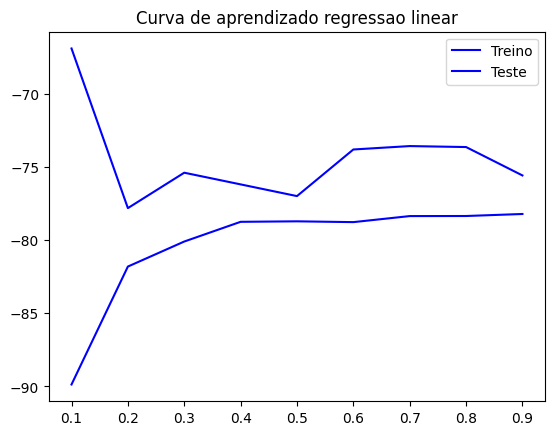

In [23]:
#gerar plot com curva de aprendizado
plt.plot(linspace(0.1,0.9,9), mean(train_scores, axis=1), color= 'b', label='Treino')

plt.plot(linspace(0.1,0.9,9), mean(test_scores, axis=1), color= 'b', label='Teste')
plt.title('Curva de aprendizado regressao linear')
plt.legend()
plt.show()


### Carregar dados - Classificação

In [24]:
#carregar dataset
df2 = pd.read_csv('./datasets/frutas.csv')

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [26]:
df2.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [27]:
#ajustar dataframe
#remover coluna A_id
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### treinar modelo de Knn com mudança de K

In [28]:
### Treinar modelo - classressão
#Separar x e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']


In [29]:
#Separar 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [31]:
#fazer um loop para treinar o modelo com diversas quantidades de vizinhos (K)
scores_train = []
scores_test = []

for i in range(1, 20, 2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    scores_train.append(f1_score(y_train, y_train_pred))
    scores_test.append(f1_score(y_test, y_test_pred))
    print(f'{i}: Train{f1_score(y_train, y_train_pred)} Teste: {f1_score(y_test, y_test_pred)}')

1: Train1.0 Teste: 0.8740617180984154
3: Train0.9452103216684341 Teste: 0.8964941569282137
5: Train0.9262266148958701 Teste: 0.8985985160758451
7: Train0.921935711762628 Teste: 0.8929460580912864
9: Train0.9186704384724187 Teste: 0.8913043478260869
11: Train0.9178130511463845 Teste: 0.8887029288702929
13: Train0.9115983026874116 Teste: 0.8881469115191987
15: Train0.9133969600565571 Teste: 0.890728476821192
17: Train0.9099258212645708 Teste: 0.8883333333333333
19: Train0.9115885875308207 Teste: 0.885


In [33]:
#criar um dataframe com os scores
df_results = pd.DataFrame({'k': range(1, 20, 2), 'train': scores_train, 'teste': scores_test})

In [37]:


xaxis = [i for i in range(1, 20, 2)]
fig = px.line(df_results, x='k', y=['train', 'test'], title="KNN performance - Mudando K")
fig.update_xaxes(tickvals=xaxis, ticktext=[str(i) for i in xaxis])
fig.show()
